## 1. Import libraries and test data

> Note that every section has to be run in order without any missing steps

The first step is to import the test data relevant for preprocessing.

We are going to categorise each user (the sample unit) by their feature if they purchase item Y.

- The `DataFrame` is a wo-dimensional, size-mutable, potentially heterogeneous tabular data which also contains labeled axes (rows and columns).
    - The `.iloc` returns the purely integer-location based indexing for selection by position.
- For the x-column, `[:,:-1]` removes the "Purchase" column.
- For the y-column, `[:,-1]` requires only for the "Purchase" column.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Data.csv')
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [2]:
# Run this to see dataset "x"
print(pd.DataFrame(x))

         0     1        2
0   France  44.0  72000.0
1    Spain  27.0  48000.0
2  Germany  30.0  54000.0
3    Spain  38.0  61000.0
4  Germany  40.0      NaN
5   France  35.0  58000.0
6    Spain   NaN  52000.0
7   France  48.0  79000.0
8  Germany  50.0  83000.0
9   France  37.0  67000.0


In [3]:
# Run this to see dataset "y"
print(pd.DataFrame(y))

     0
0   No
1  Yes
2   No
3   No
4  Yes
5  Yes
6   No
7  Yes
8   No
9  Yes


## 2. Clean up missing data

There are several strategies that can be applied.

1. Mean (code segment e.g. `strategy='mean')`)
2. Median (code segment e.g. `strategy='median')`)
3. Mode (code segment e.g. `strategy='most_frequent')`)
4. Constant value such as `0` (segment e.g. `strategy='constant', fill_value=0)`)

For this tutorial, we are using the mean.

- The `SimpleImputer` is an imputation transformer for completing missing values.
    - In statistics, imputation is the process of replacing missing data with substituted values.
    - Note that the "transformer" in here does not relate to any machine learning algorithms. This is in relation to a design pattern [here](https://dzone.com/articles/transformer-pattern).
    - The method `.fit()` attempts to fit the imputer with the mean and `.transform()` is meant to transform the data with the mean strategy.
- The `x[:,1:3]` returns the range of the missing data as seen above (which are the numbers).

In [4]:
from sklearn.impute import SimpleImputer

# Run step 1 again and apply code changes to see differences.
imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer_mean.fit(x[:,1:3])
x[:, 1:3] = imputer_mean.transform(x[:,1:3])

In [5]:
# Run this to see the result of using mean to clean.
print(pd.DataFrame(x))

         0          1             2
0   France       44.0       72000.0
1    Spain       27.0       48000.0
2  Germany       30.0       54000.0
3    Spain       38.0       61000.0
4  Germany       40.0  63777.777778
5   France       35.0       58000.0
6    Spain  38.777778       52000.0
7   France       48.0       79000.0
8  Germany       50.0       83000.0
9   France       37.0       67000.0


## 3. Encoding the Categorical data

For the x-axis, the data is independent as it does not rely on any other sets.

Using the One-Hot encoding, it should appear like this,

| France | Spain | Germany |
| ------ | ----- | ------- |
| 1 | 0 | 0 |
| 0 | 1 | 0 |
| 0 | 0 | 1 |

For the y-axis, the data is dependent on the x-axis for reference.

Using the Label encoding, it should appear like this,

| No | Yes |
| ---- | ----- |
| `0` | `1` |

We will apply Label encoding for this.

- Note that `.fit_transform()` does an operation of both fit + transform (apply).

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

le = LabelEncoder()
y = le.fit_transform(y)

In [7]:
# Run this to see the output transform
print(pd.DataFrame(x), "\n")
# encoder__xn_<name> where "n" is the index of the onehot encoder table
print(pd.DataFrame(ct.get_feature_names()).transpose())

     0    1    2          3             4
0  1.0  0.0  0.0       44.0       72000.0
1  0.0  0.0  1.0       27.0       48000.0
2  0.0  1.0  0.0       30.0       54000.0
3  0.0  0.0  1.0       38.0       61000.0
4  0.0  1.0  0.0       40.0  63777.777778
5  1.0  0.0  0.0       35.0       58000.0
6  0.0  0.0  1.0  38.777778       52000.0
7  1.0  0.0  0.0       48.0       79000.0
8  0.0  1.0  0.0       50.0       83000.0
9  1.0  0.0  0.0       37.0       67000.0 

                    0                    1                  2   3   4
0  encoder__x0_France  encoder__x0_Germany  encoder__x0_Spain  x1  x2


In [8]:
# Run this to see the output transform
print(pd.DataFrame(y), "\n")
# See the labels starting from 0..n
print(pd.DataFrame(le.classes_).transpose())

   0
0  0
1  1
2  0
3  0
4  1
5  1
6  0
7  1
8  0
9  1 

    0    1
0  No  Yes


## 4. Feature scaling

There are 2 types of strategies we will look into: Normalize and Standardize

- KDE 

In [9]:
# Run this for Standardize strategy
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x[:, 3:] = sc.fit_transform(x[:, 3:])

In [10]:
# Run this for Normalize strategy
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
x[:, 3:] = sc.fit_transform(x[:, 3:])

Min (adj) [0,1]:  [0.51207729 0.45079365]
Scale [0,1]:  [0.29919727 0.31344766]
Min [0,1]:  [-1.71150388 -1.43817841]
Max [0,1]:  [1.63077256 1.75214693]
Range [0,1]:  [3.34227644 3.19032534]
     0    1    2         3         4
0  1.0  0.0  0.0   0.73913  0.685714
1  0.0  0.0  1.0       0.0       0.0
2  0.0  1.0  0.0  0.130435  0.171429
3  0.0  0.0  1.0  0.478261  0.371429
4  0.0  1.0  0.0  0.565217  0.450794
5  1.0  0.0  0.0  0.347826  0.285714
6  0.0  0.0  1.0  0.512077  0.114286
7  1.0  0.0  0.0  0.913043  0.885714
8  0.0  1.0  0.0       1.0       1.0
9  1.0  0.0  0.0  0.434783  0.542857


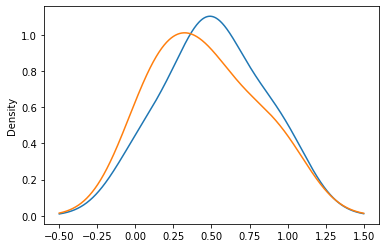

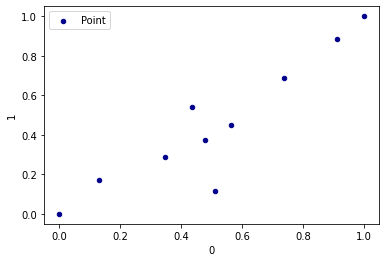

In [11]:
if hasattr(sc, 'mean_'):
    print('Mean [0,1]: ', sc.mean_)
    print('Variance [0,1]: ', sc.var_)
    print('Scale [0,1]: ', sc.scale_)

else:
    print('Min (adj) [0,1]: ', sc.min_)
    print('Scale [0,1]: ', sc.scale_)
    print('Min [0,1]: ', sc.data_min_)
    print('Max [0,1]: ', sc.data_max_)
    print('Range [0,1]: ', sc.data_range_)

# KDE distribution
kde0 = pd.Series(x[:, 3])
kde0.plot.kde()

kde1 = pd.Series(x[:, 4])
kde1.plot.kde()

# Scatterplot
scatt = pd.DataFrame(x[:, 3:])
scatt.plot.scatter(x=0, y=1, color="DarkBlue", label="Point")

print(pd.DataFrame(x))

## 5. Split dataset into training and test data

For this tutorial, we are ignoring the need to use validation datasets.

We will do a split of `60%`-`40%` training and test datasets.

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)

In [13]:
print(pd.DataFrame(x_train), "\n")
print(pd.DataFrame(x_test))

     0    1    2         3         4
0  0.0  1.0  0.0       1.0       1.0
1  0.0  1.0  0.0  0.565217  0.450794
2  1.0  0.0  0.0  0.347826  0.285714
3  1.0  0.0  0.0   0.73913  0.685714
4  0.0  0.0  1.0  0.478261  0.371429
5  1.0  0.0  0.0  0.434783  0.542857 

     0    1    2         3         4
0  0.0  0.0  1.0  0.512077  0.114286
1  0.0  0.0  1.0       0.0       0.0
2  0.0  1.0  0.0  0.130435  0.171429
3  1.0  0.0  0.0  0.913043  0.885714


In [14]:
print(pd.DataFrame(y_train), "\n")
print(pd.DataFrame(y_test))

   0
0  0
1  1
2  1
3  0
4  0
5  1 

   0
0  0
1  1
2  0
3  1
